<h1>Задание 2</h1>

Реализовать вторую версию программы построения частотного словаря, в которой для нормализации используется стеммер (найти необходимую библиотеку самостоятельно). Сравнить построенные частотные словари. (1 балла)

In [170]:
#!pip3 install PyStemmer

In [171]:
import Stemmer
stemmer = Stemmer.Stemmer('russian')
stemmer.stemWord('ковриков')

'коврик'

In [172]:
#!pip3 install snowballstemmer

import snowballstemmer

stemmer = snowballstemmer.stemmer('russian');
print(stemmer.stemWords("Я тебя люблю".split()));

<h2> Импорт библиотек </h2>

In [215]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

#Create stopwords list
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', 'к', 'на'])

In [216]:
punctuation += '...' + '—' + '«' + '»'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~...—«»'

<h2> Определение функций </h2>

In [217]:
def get_text(file_name):
    txt = ''
    with open(file_name) as f:
        for line in f:
            line = line.rstrip("\r\n")
            line = line.rstrip(".—")
            txt += line + ' '
    return(txt)

In [218]:
def get_sentences(text):
    split_regex = re.compile(r'[.|!|?|…]')
    sentences = filter(lambda t: t, [t.strip() for t in split_regex.split(text)])
    corpus = []
    for s in sentences:
        corpus.append(s)
    return(corpus)

In [219]:
#Preprocess function
def preprocess_text2(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    stemmed_tokens = stemmer.stemWords(tokens)
    filtered_tokens = []
    for word in stemmed_tokens:
        if (word not in russian_stopwords) and (word != " ") and (word not in punctuation):
            filtered_tokens.append(word)
    
    
    return filtered_tokens

<h2>Начало работы</h2>

In [237]:
txt = get_text('text.txt')
txt = get_sentences(txt)
txt = ' '.join(txt)

In [238]:
t = preprocess_text2(txt)

In [240]:
#t

In [241]:
from nltk import FreqDist
frequency_distribution = FreqDist(t)

#for key in frequency_distribution:
 #   print(key, frequency_distribution[key])

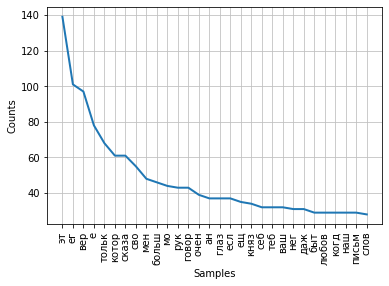

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [242]:
frequency_distribution.plot(30, cumulative=False)

In [243]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [244]:
%matplotlib inline

In [245]:
text_raw = " ".join(t)

In [246]:
word_cloud = WordCloud().generate(text_raw)

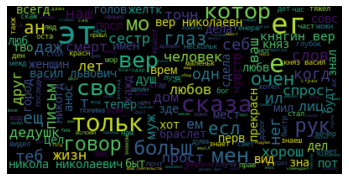

In [247]:
wordcloud = WordCloud(max_font_size=40).generate(text_raw)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h2>Запись в файл</h2>

In [248]:
with open('result21.txt','w') as f:
    for key in frequency_distribution:
        f.write(key+' : '+str(frequency_distribution[key])+ '\n')
f.close()

<h1>Попробовала применить стеммер к списку стоп-слов</h1>

In [249]:
russian_stopwords_lem = stemmer.stemWords(russian_stopwords)
#Preprocess function
def preprocess_text3(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    stemmed_tokens = stemmer.stemWords(tokens)
    filtered_tokens = []
    for word in stemmed_tokens:
        if (word not in russian_stopwords_lem) and (word != " ") and (word not in punctuation):
            filtered_tokens.append(word)
    
    
    return filtered_tokens

In [250]:
t = preprocess_text3(txt)

In [252]:
from nltk import FreqDist
frequency_distribution = FreqDist(t)

#for key in frequency_distribution:
    #print(key, frequency_distribution[key])

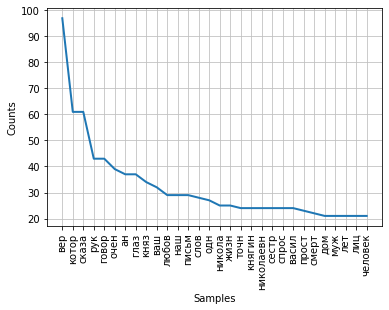

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [253]:
frequency_distribution.plot(30, cumulative=False)

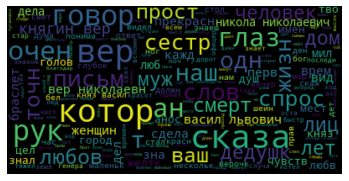

In [254]:
text_raw = " ".join(t)
wordcloud = WordCloud(max_font_size=40).generate(text_raw)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h2>Запись в файл</h2>

In [255]:
with open('result22.txt','w') as f:
    for key in frequency_distribution:
        f.write(key+' : '+str(frequency_distribution[key])+ '\n')
f.close()